# 人臉辨識與數位美妝應用
入門電腦視覺人臉辨識
- 1. 人臉數據取得
- 2. OpenCV 做人臉辨識
- 3. 使用 face_recognition 做人臉辨識
- 4. 人臉馬賽克應用

## 0. 連接雲端硬碟（Colab+Google Drive)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/class_AI/face_recognition'

!pwd
!ls

Mounted at /content/drive
/content/drive/My Drive/class_AI/face_recognition
/content/drive/My Drive/class_AI/face_recognition
1_begin.ipynb	face3.jpg   face9b.jpg	head1.jpg  sunglasses1.png  sunglasses3.png
2_makeup.ipynb	face9a.jpg  face9.jpg	RGB.jpg    sunglasses2.png  sunglasses.png


In [ ]:
# 上傳一個檔案
from google.colab import files
uploaded = files.upload()

## 1. 人臉數據取得

### 虛擬人臉產生器 face generator
https://thispersondoesnotexist.com/
網頁每重整一次就會顯示一張`虛擬人造臉`

### 使用`深度學習`生成`人造人臉`🧑，應用技術為深度卷積生成對抗網路（DCGAN）
### 作者是Greg gsurma，LICENSE是MIT可使用於商業用途
https://github.com/gsurma/face_generator/blob/master/LICENSE

![alt text](https://github.com/gsurma/face_generator/raw/master/assets/epochs.gif)

這都是虛擬人造人臉


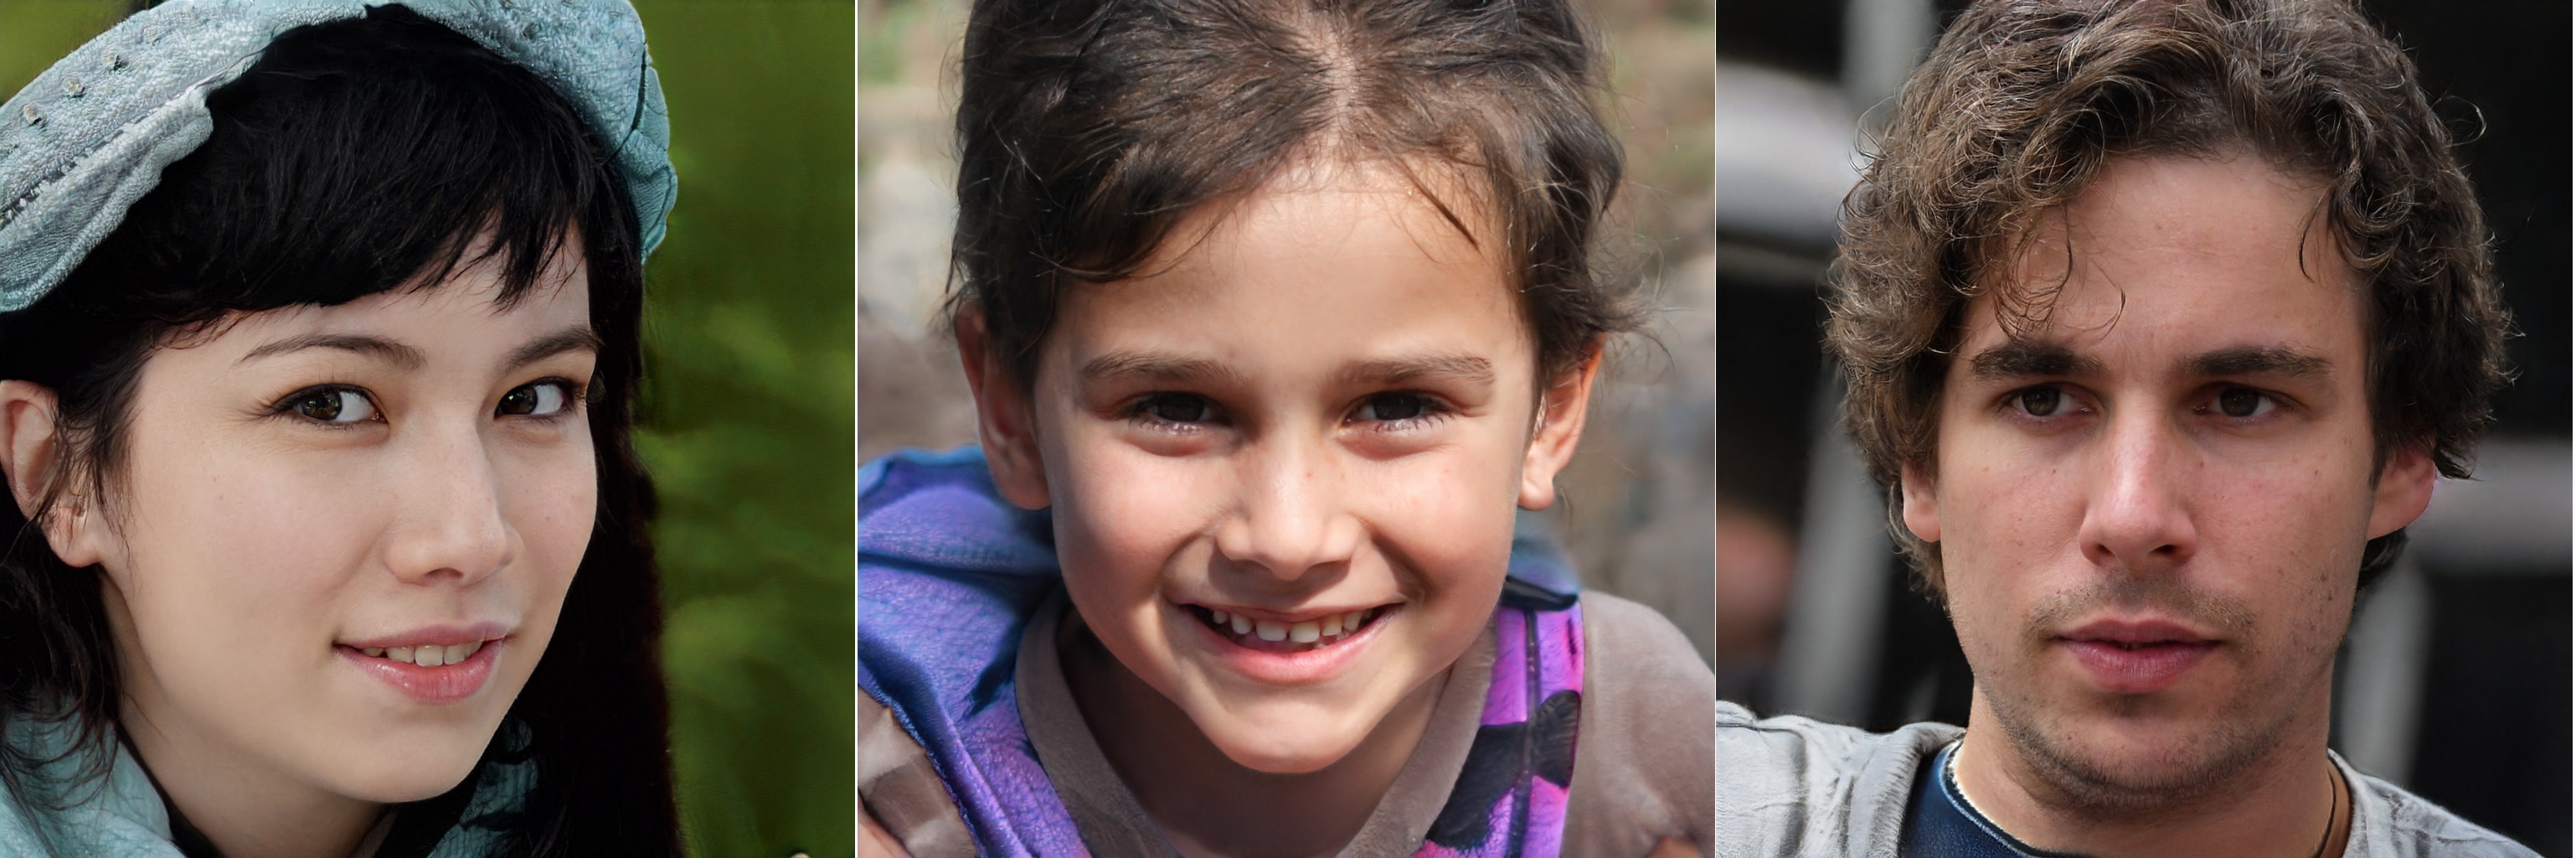

In [2]:
# 查看圖像
from IPython.display import Image
print('這都是虛擬人造人臉')
Image('face3.jpg', width=400)

### 另一個數據來源是免費圖庫
https://www.pexels.com

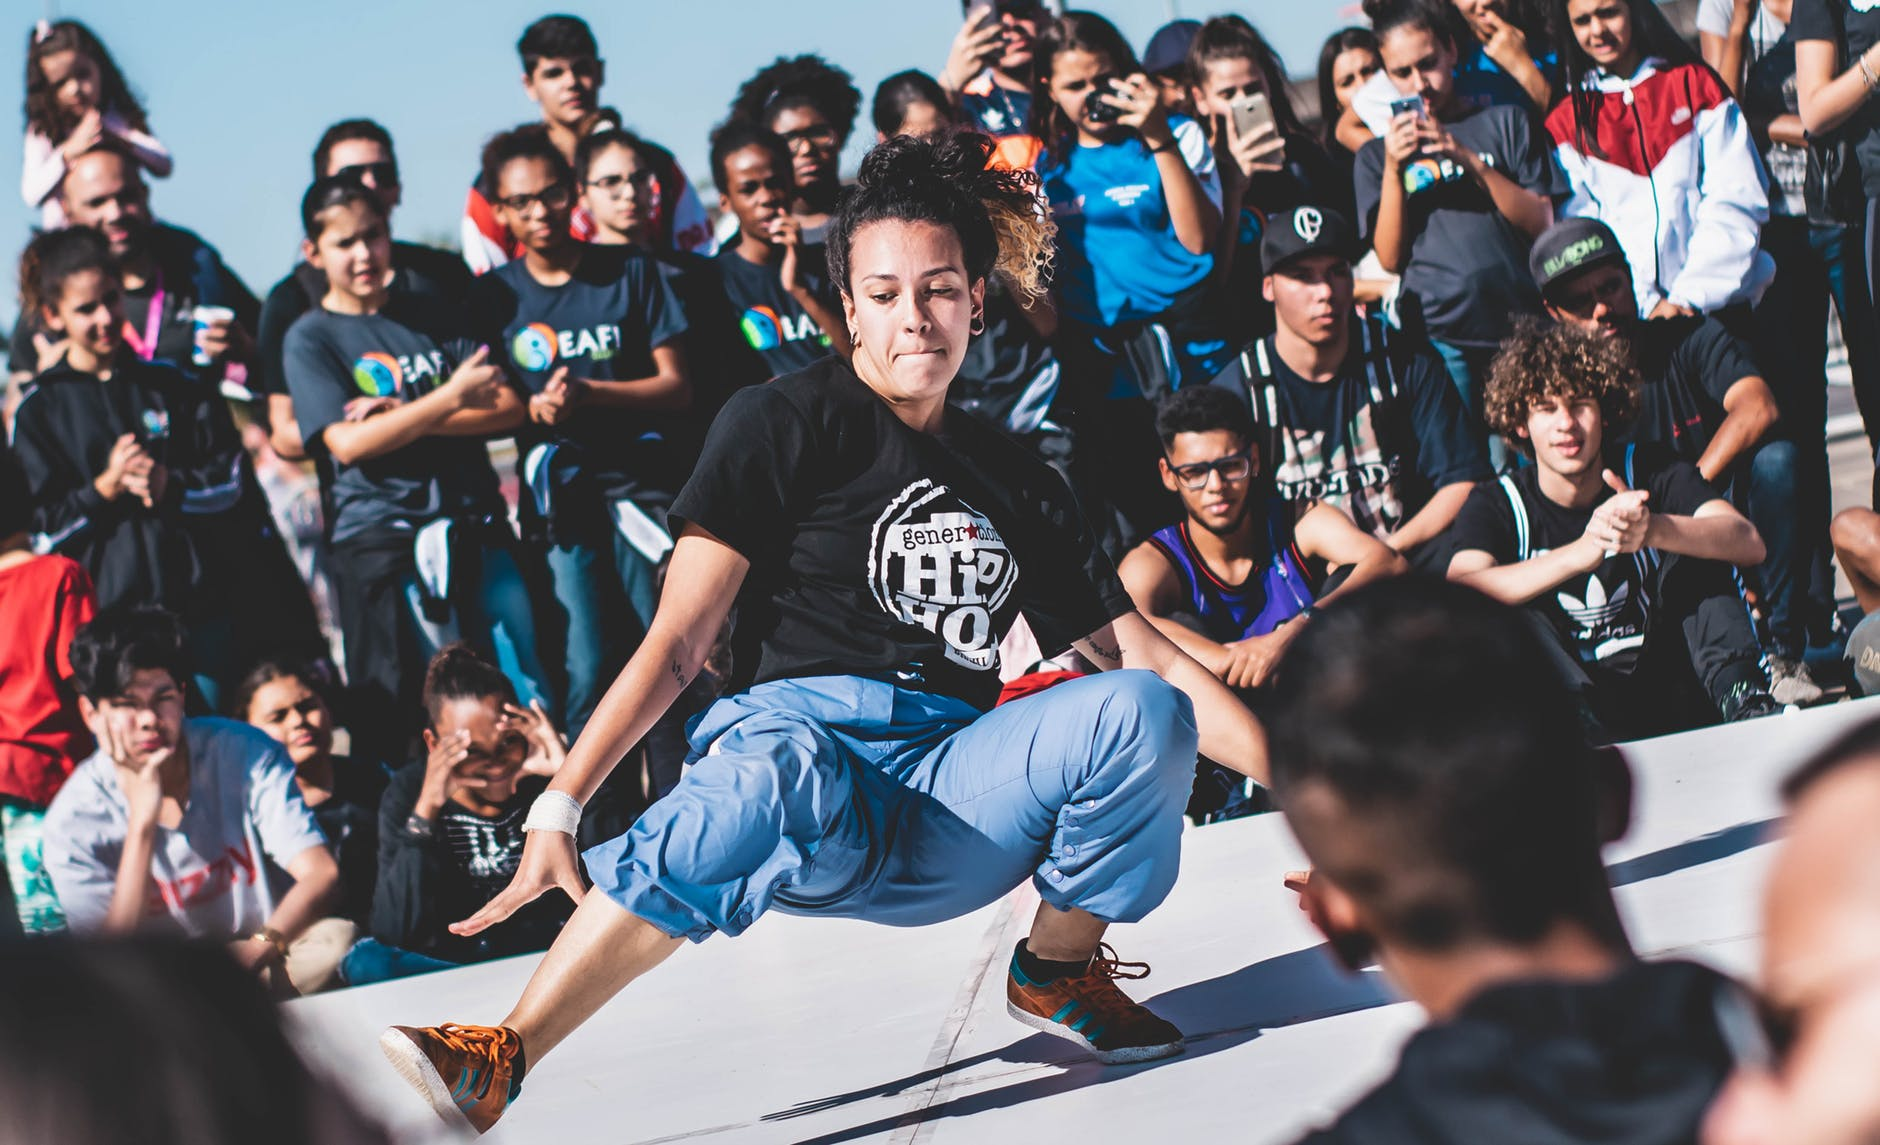

In [3]:
# 查看圖檔
Image('face9.jpg',width=400)
# Image('face9a.jpg',width=400)
# Image('face9b.jpg',width=400)

## 2. OpenCV 電腦視覺

In [4]:
# 匯入 OpenCV
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
cv2.__version__ #版本不斷更新中

'4.8.0'

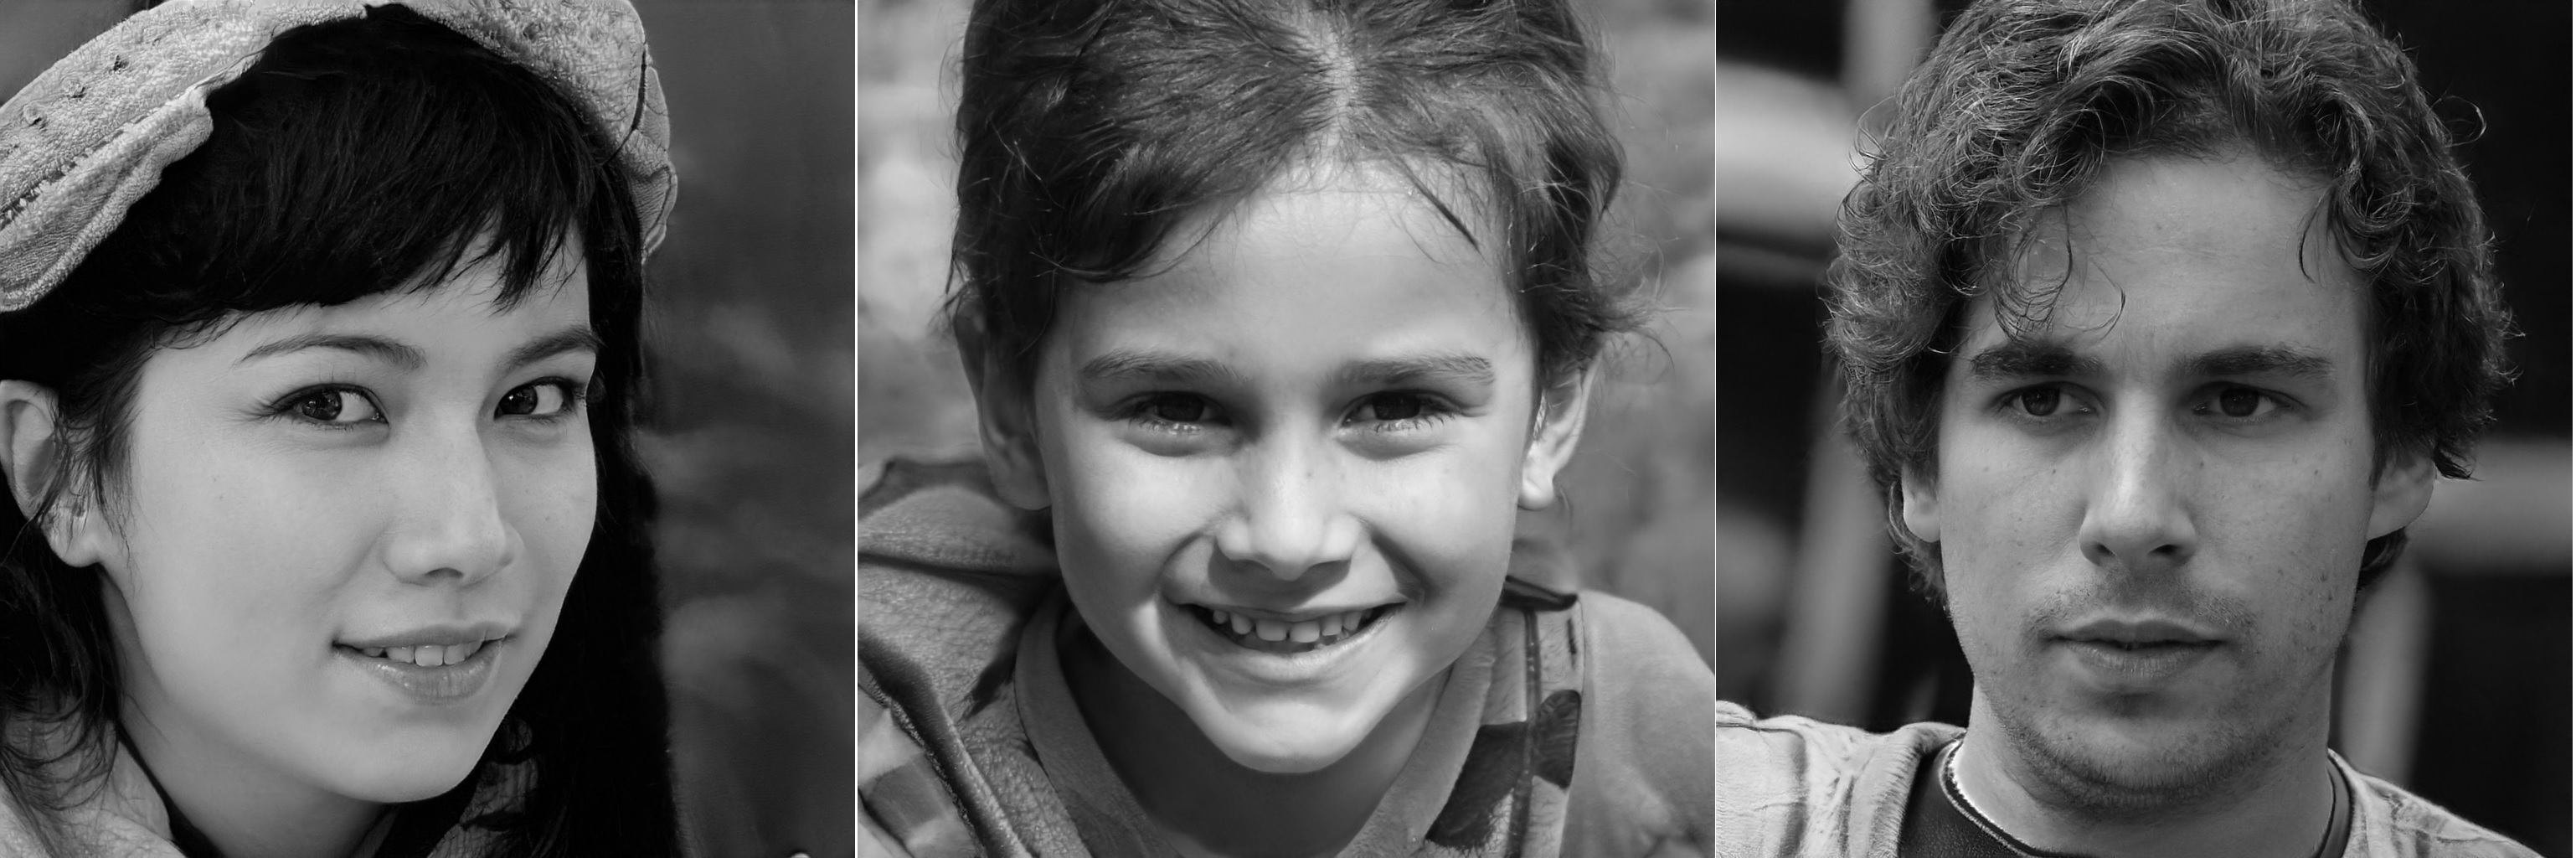

In [5]:
# 用 OpenCV 顯示圖片 (在colab中改用cv2_imshow)

img = cv2.imread('face3.jpg' ,0) #0 grayscale 1 color

from google.colab.patches import cv2_imshow
try:
    cv2.imshow('image',img)
except:
    cv2_imshow(img)

In [6]:
# 灰階或黑白圖片只有一個通道
img.shape

(1024, 3076)

In [7]:
# 讀取彩色圖片
img = cv2.imread('face3.jpg', 1)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# 檢查 shape
img.shape

(1024, 3076, 3)

### 使用 matplotlib 顯示圖片

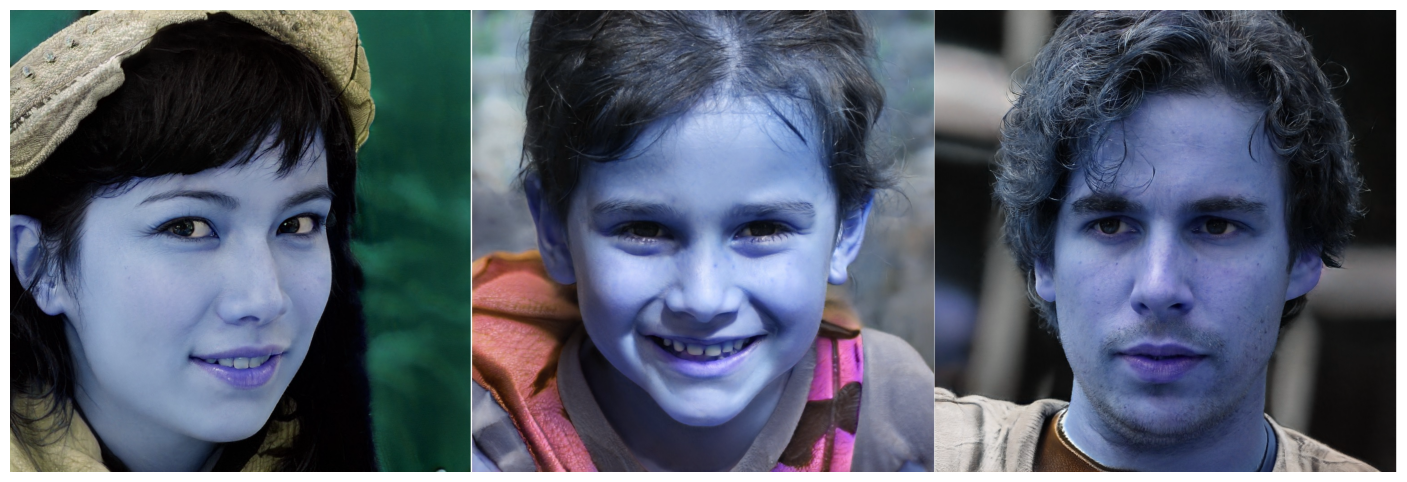

In [9]:
# 使用 matplotlib 顯示圖片
%matplotlib inline
import matplotlib.pyplot as plt
img = cv2.imread('face3.jpg')

plt.figure(figsize=(18, 6))
plt.axis('off')
plt.imshow(img)

### 🔔openCV是 BGR，matplot是 RGB

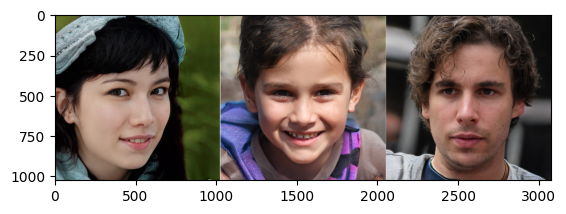

In [10]:
# BGR2RGB
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

### RGB三通道分離

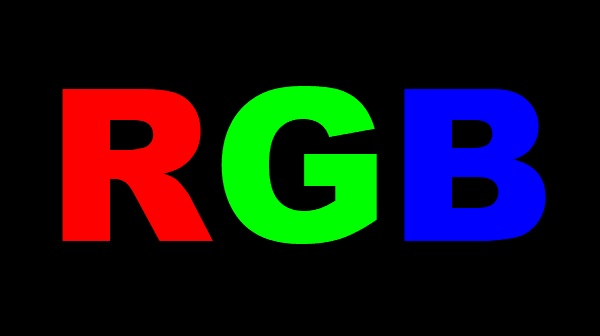

In [11]:
#
Image('RGB.jpg',width=300)

In [12]:
#
image = cv2.imread('RGB.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 通道 R:0 G:1 B:2
r = image.copy()

# : 當頭尾都省略表示全選
r[:, :, 1] = 0 # G=0(0黑色 255白)
r[:, :, 2] = 0 # B=0

g = image.copy()
g[:, :, 0] = 0 # R=0
g[:, :, 2] = 0 # B=0

b = image.copy()
b[:, :, 0] = 0
b[:, :, 1] = 0

image.shape

(336, 600, 3)

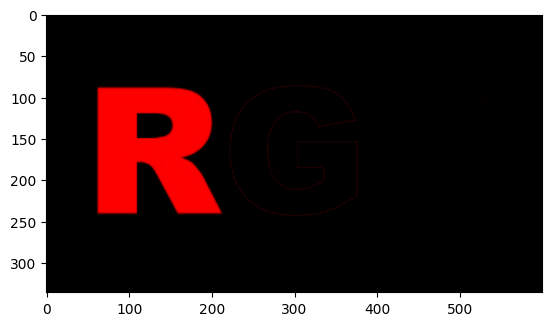

In [13]:
#
plt.imshow(r)

### 下載open CV 人臉分類器

In [14]:
# 使用特徵檢測+機器學習演算法，從影像中找到人臉
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2024-03-22 07:20:56--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2024-03-22 07:20:57 (18.0 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [15]:
# openCV 辨識人臉 4 步驟
# 1. 載入圖片
image = cv2.imread('face3.jpg')
# 2. 圖片轉灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 3. 載入分類器
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# 4. 使用分類器從圖片找到人臉
faces = haar.detectMultiScale(gray) #偵測人臉
# 得到的結果是 臉的左上角座標與寬、高的像素座標(0,0在最左上角)
print('找到臉的數量=', len(faces))
print(faces)

找到臉的數量= 3
[[2208  213  685  685]
 [ 118  198  732  732]
 [1174  211  715  715]]


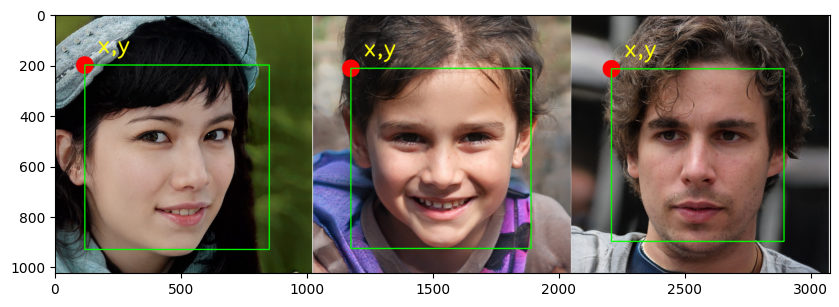

In [16]:
# 在找到的人臉位置畫出矩形成
for (x,y,w,h) in faces: #左上角座標x,y與寬w、高h
    #圓形 cv2.circle(影像, 圓心座標, 半徑, 顏色, 線條寬度) 負數代表實心
    cv2.circle(image,(x, y), 35, (0, 0, 255), -1) #紅點標示x,y
    #矩形 cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
    cv2.rectangle(image,(x,y), (x+w,y+h), (0,255,0), 3) #畫矩形框 可改框的顏色/線條粗細
    #文字 cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
    cv2.putText(image, ('x,y'), (x+50, y-50), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 255), 5, cv2.LINE_AA)

plt.figure(figsize=(10,4)) #設定顯示尺寸
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #BGR to RGB

### 練習1.找一張圖片有10個以上人臉,並偵測人臉數量


17


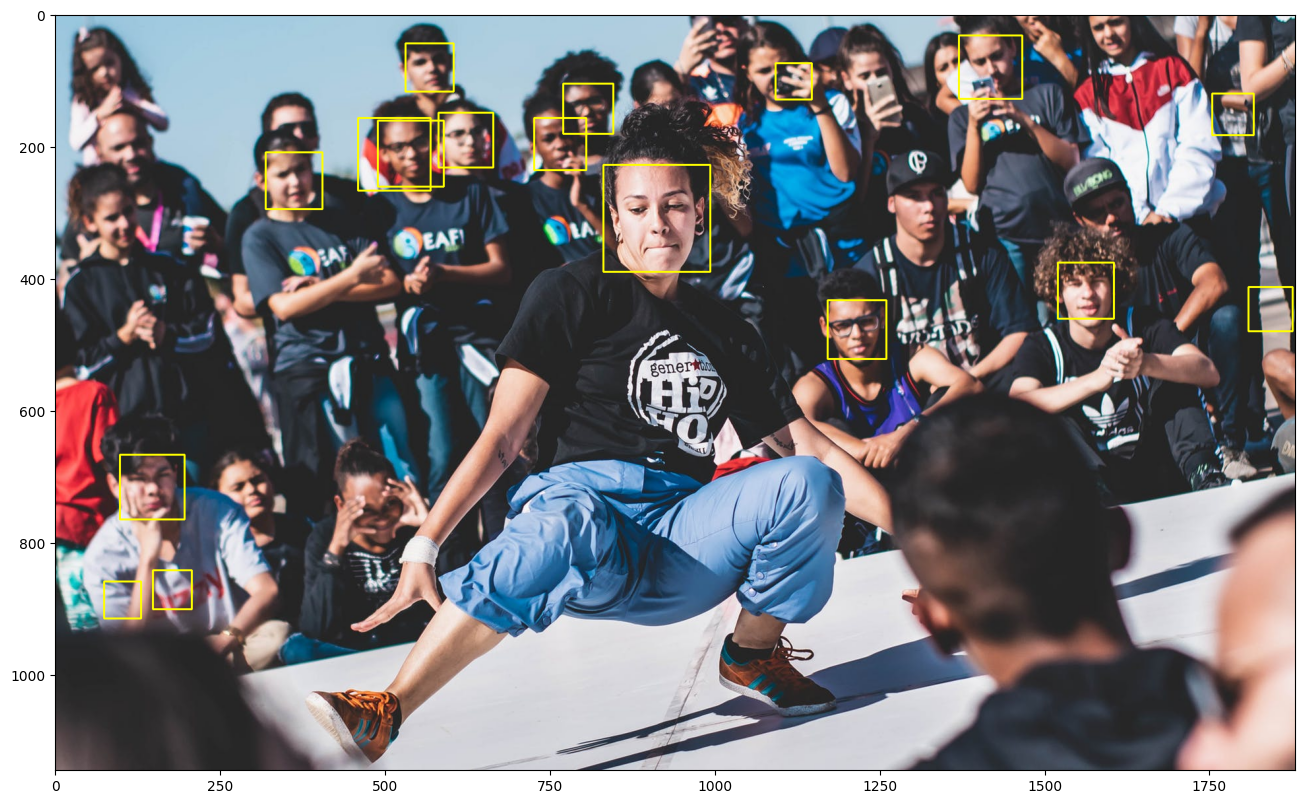

In [18]:
# 練習
filename = 'face9.jpg'
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #圖片轉灰階
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #載入分類器
faces = haar.detectMultiScale(gray) #偵測人臉
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),2) #畫矩形框 可改框的顏色/線條粗細
plt.figure(figsize=(16,12)) #設定顯示尺寸
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #BGR to RGB
print(len(faces))

## 3. 使用 face_recognition 做人臉辨識
face_recognition 是python第三方模組，基於深度學習的人臉辨識功能

In [19]:
# 安裝模組
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=17faa0fe8066efa821bd6fc008fa21e1631328de89cbf74ec1ebf61d644086ac
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [20]:
# 匯入人臉辨識模組
import face_recognition

找到臉的數量= 6


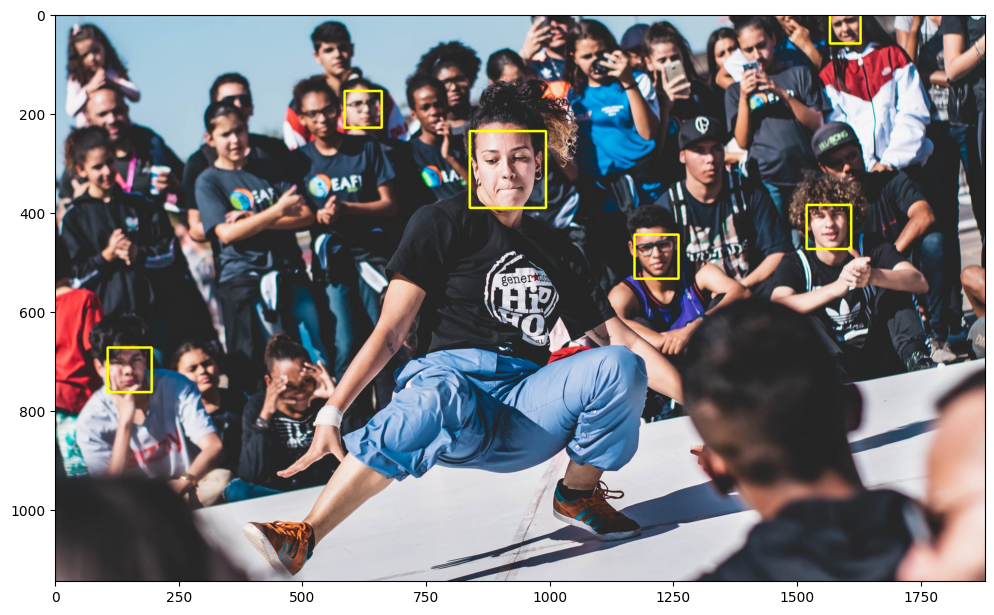

In [21]:
# 使用 face_recognition 人臉辨識
filename = 'face9.jpg'
image = face_recognition.load_image_file(filename)

# faces = face_recognition.face_locations(image, model='hog')  # Histogram of Gradient
faces = face_recognition.face_locations(image, model='CNN')
print('找到臉的數量=', len(faces))

for (top, right, bottom, left) in faces: #畫矩形框 可改框的顏色/線條粗細
    cv2.rectangle(image, (left, top), (right, bottom), (255, 255, 0), 3)
plt.figure(figsize=(12,10))
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(image)

## 注意：使用 cnn 發生 CUDNN_STATUS_NOT_SUPPORTED 情形

這問題發生的原因是face_recognition底層套件(程式庫)dlib進版。

dlib是一個用編程語言C++編寫的通用跨平台軟件庫，近年來許多機器學習套件都是基於dlib而發展應用，簡單說底層程式進版，應用層就會出現相容錯誤，解決方法之一，就是dlib降版就依然可以成功執行

首先降版 dlib 執行

!pip install dlib==19.22.1

執行約10分鐘(會有點久)完成後出現RESTART RUNTIME提示點擊執行RESTART RUNTIME後
colab暫存清空，需要重新切換資料夾，重新import套件

%cd "/content/drive/My Drive/xxxxxxxx"

import cv2

import matplotlib.pyplot as plt

import face_recognition #人臉辨識模組

接著再執行原程式就沒有錯誤訊息了

In [ ]:
# 注意：使用 cnn 發生 CUDNN_STATUS_NOT_SUPPORTED 情形
# 降版 dlib==19.22.1
# !pip install dlib==19.22.1


In [ ]:
# 因為 restart 後，runtime 需要重新切換資料夾，重新 import 套件

%cd '/content/drive/My Drive/class_AI/face_recognition'
import cv2
import matplotlib.pyplot as plt
import face_recognition


In [ ]:
# 使用 face_recognition 人臉辨識
filename = 'face9.jpg'
image = face_recognition.load_image_file(filename)

# faces = face_recognition.face_locations(image, model='hog')  # Histogram of Gradient
faces = face_recognition.face_locations(image, model='CNN')
print('找到臉的數量=', len(faces))

for (top, right, bottom, left) in faces: #畫矩形框 可改框的顏色/線條粗細
    cv2.rectangle(image, (left, top), (right, bottom), (255, 255, 0), 3)
plt.figure(figsize=(12,10))
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(image)


### 練習2.找一張圖片有10~20個人臉,並偵測人臉數量

In [ ]:
# 練習
import cv2
import face_recognition
%matplotlib inline
import matplotlib.pyplot as plt

filename = 'face9a.jpg'
image = face_recognition.load_image_file(filename)
faces = face_recognition.face_locations(image, model='CNN')
print('找到臉的數量=', len(faces))
for (top, right, bottom, left) in faces: #畫矩形框 可改框的顏色/線條粗細
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
plt.figure(figsize=(12,10))
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(image)

### 若發生記憶體不足，請重啟 runtime
 `Runtime > Restart runtime`

## 4. 人臉馬賽克應用

In [ ]:
from PIL import Image, ImageDraw

# 總結
filename = 'face3.jpg'
image = face_recognition.load_image_file(filename)
faces = face_recognition.face_locations(image, model='CNN')  # 改用 CNN
print('找到臉的數量=', len(faces))
pil_image = Image.fromarray(image)
for (top, right, bottom, left) in faces: #畫矩形框 可改框的顏色/線條粗細
    print(top, right, bottom, left)

In [ ]:
# 人臉馬賽克
filename = 'face3.jpg'
image = face_recognition.load_image_file(filename)
faces = face_recognition.face_locations(image) # ,model='CNN')
print('找到臉的數量=', len(faces))
pil_image = Image.fromarray(image)
for (top, right, bottom, left) in faces: #取出座標
    draw = ImageDraw.Draw(pil_image, 'RGBA') #RGB A:透明度
    leftUpPoint = (left, top) #左上角
    rightDownPoint = (right, bottom) #右下角
    twoPointList = [leftUpPoint, rightDownPoint] #兩點畫圓
    draw.ellipse(twoPointList, fill=(166,166,166,230))
    pil_image.show()
display(pil_image)

In [ ]:
# 快速多人人臉馬賽克
filename = 'face9.jpg'
image = face_recognition.load_image_file(filename)
faces = face_recognition.face_locations(image ,model='CNN')
print('找到臉的數量=', len(faces))
pil_image = Image.fromarray(image)
for (top, right, bottom, left) in faces: #取出座標
    draw = ImageDraw.Draw(pil_image, 'RGBA') #RGB A:透明度
    leftUpPoint = (left, top) #左上角
    rightDownPoint = (right, bottom) #右下角
    twoPointList = [leftUpPoint, rightDownPoint] #兩點畫圓
    draw.ellipse(twoPointList, fill=(166,166,166,205))
    pil_image.show()
pil_image.save('output.jpg')
display(pil_image)